<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

In [12]:
from matplotlib import pyplot as plt
import numpy as np


### 1.2 NumPy’s PRNG

In [10]:
np.random.rand(), np.random.rand(10), np.random.rand(5,2)             # Give five sets of 2          # Give ten numbers`            # Give one number

(0.4590862532782065,
 array([0.73733372, 0.75780358, 0.59013189, 0.29196752, 0.00347457,
        0.9527263 , 0.48501538, 0.80246392, 0.71958371, 0.48833265]),
 array([[0.89768293, 0.99575684],
        [0.80649487, 0.89850138],
        [0.36835404, 0.87449493],
        [0.92561234, 0.81871529],
        [0.21710395, 0.10618868]]))

In [9]:
n = 10000
random_numbers = np.random.rand(n)
# The numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100
# The numbers less than .25 must be about 25%
np.sum(random_numbers < .25) / n * 100
# The numbers more than .75 must be about 25%
np.sum(random_numbers > .75) / n * 100

25.27

### 1.3 A simple graphical test

Text(0, 0.5, 'Value of random number')

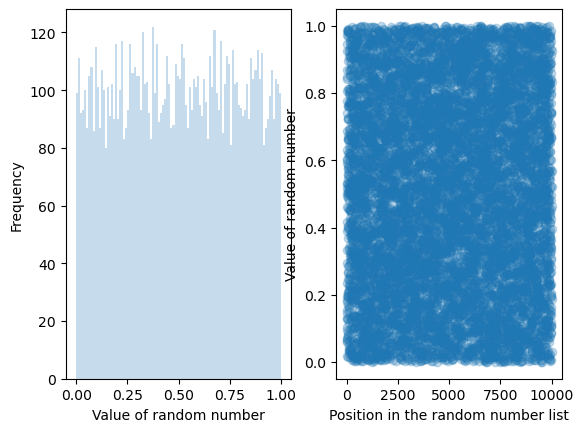

In [13]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.4 Uniformly beyond \([0,1)\)

Text(0, 0.5, 'Value of random number')

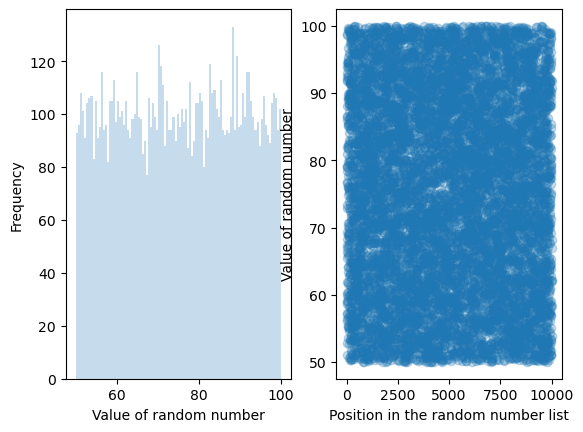

In [14]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.5 ‘seeding’ a PRNG

In [15]:
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100



array([ 0,  1, 75, 28, 66, 17, 83, 24, 83,  8])

In [16]:
np.random.randint(0, 100, 10)     # Another ten integers between 0 and 100

array([12, 37, 54, 28, 30, 58, 72, 12, 92, 56])

In [17]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [18]:
np.random.seed(1234)
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [19]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

In [20]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Ask again later.

Q: Will I be rich?
A: Better not tell you now.

Q: Will I be in trouble?
A: My reply is no.



## 3 Flipping Coins

### 3.1 A fair coin

In [21]:
np.random.choice(['Head', 'Tails'])


'Head'

In [22]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Tails', 'Head', 'Tails', 'Tails', 'Head', 'Head', 'Tails', 'Head',
       'Head', 'Tails'], dtype='<U5')

In [24]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

In [25]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 51.60%


### 3.2 A biased coin

In [28]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 71.40%


### 3.3 A flipping experiment

In [34]:

no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)

In [35]:
heads_probability = heads_counts/no_of_repeats

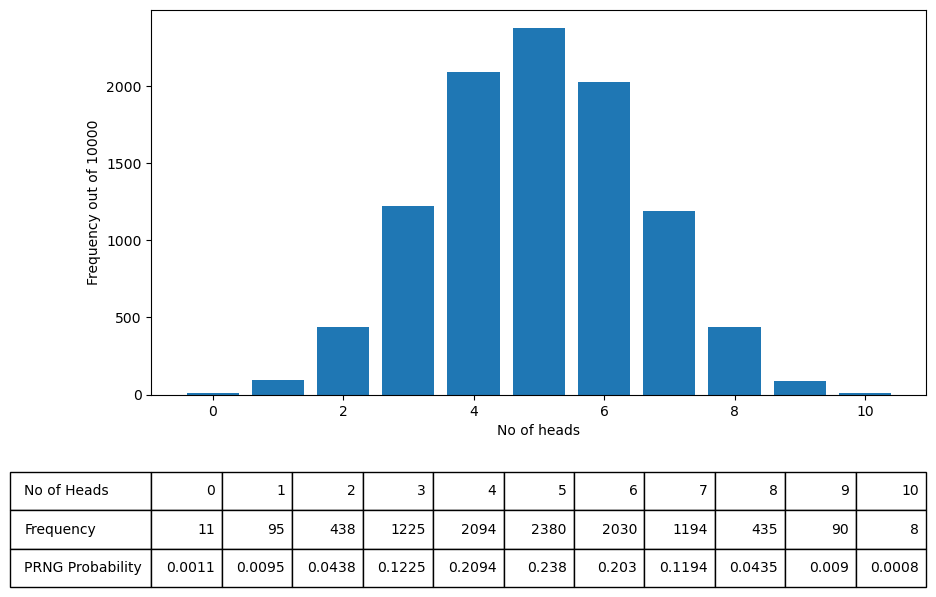

In [42]:
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

In [44]:
from scipy.stats import binom
binom.pmf(k=7, n=10, p=.5)
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

ModuleNotFoundError: No module named 'scipy'

## Exercise 1 :  12C, 13C

In [111]:
def thirteen_carbon(no_of_atoms=27, probability=.9889):
    results = np.random.rand(no_of_atoms)
    no_of_13carbon = np.sum(results > probability)
    return no_of_13carbon


In [112]:
no_of_repeats = 10_000
result = [thirteen_carbon() for _ in range(no_of_repeats)]
print(f'mean number of 13C atoms is {np.mean(result)} and standard deviation is {np.std(result)}')

mean number of 13C atoms is 0.301 and standard deviation is 0.5422167463293622


In [114]:
number_of_repeats=10_000
zero =[thirteen_carbon()==0 for _ in range(number_of_repeats)]
x=0
for i in zero:
    if i==True:
        x+=1
        
no_thirteen_C_probability=x/number_of_repeats
# no_of_zeros,zero_counts = np.unique(zero, return_counts=True)
#tried to use np.unique but that will count the number of "False" as well and i will end up with 2 values in the end

# no_thirteen_C_probability= zero_counts/number_of_repeats

print(no_thirteen_C_probability)

0.7422
